In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

In [2]:
rb=RobotBuilder()

## rootlink

In [3]:
p_baselength = 2.0
p_size = 0.2
p_ssize = 0.05
p_baseheight = 1.0
p_armlength = 1.3
p_offset = 0.1
g_color = [0.2, 0.7, 0.2]
a_color = [0.7, 0.2, 0.2]
p_lsize=0.12
p_lastlength = 0.6
p_j2_len = 1.0

In [4]:
b0=rb.makeBox(p_baselength, p_size, p_size, color=g_color)
b0.translate(fv(0, 0, 0.5*p_size))
b1=rb.makeBox(p_baselength, p_ssize, p_ssize, color=a_color)
b1.translate(fv(0, 0.5*(p_size + p_ssize), 0.5*p_size))

Wrap: <coordinates[0x584f57baee60] 0 0.125 0.1 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7e04376beeb0>

In [5]:
l_root=rb.createLinkFromShape(name='Root', root=True, density=400.0)

## link0

In [6]:
b2=rb.makeBox(p_size, p_size + p_offset, p_baseheight, color=g_color)
b2.translate(fv(0, 0, 0.5*(p_baseheight + p_size + p_ssize)))
b3=rb.makeBox(p_size, p_armlength, p_size, color=g_color)
b3.translate(fv(0, (p_armlength + p_size + p_offset)*0.5, p_baseheight + 0.5*p_ssize))
b4=rb.makeBox(p_ssize, p_armlength, p_ssize, color=a_color)
b4.translate(fv((p_size + p_ssize)*0.5, (p_armlength + p_size + p_offset)*0.5, p_baseheight + 0.5*p_ssize))

Wrap: <coordinates[0x584f57446bd0] 0.125 0.8 1.025 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7e04366b0b70>

In [7]:
j=rb.createJointShape(jointType=Link.JointType.PrismaticJoint)
j.rotate(-PI/2, coordinates.Z)
j.translate(fv(0, 0, p_size))

Wrap: <coordinates[0x584f57ca3d10] 0 0 0.2 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7e04640365f0>

In [8]:
l0=rb.createLinkFromShape(name='LINK0', parentLink=l_root, density=400.0, JointId=0, JointName='JOINT0',
                          InitialJointAngle=0.0, JointRange=[-1.0, 1.0], JointVelocityRange=[-PI*10, PI*10], JointEffortRange=[-100, 100],
                          EquivalentRotorInertia=0.1)

## link1

In [9]:
b5=rb.makeBox(p_lastlength, p_size, p_size, color=g_color)
b5.translate(fv(0.5*(p_lastlength - p_size - p_offset), (p_armlength + p_size + p_offset)*0.5, p_baseheight + p_ssize + 0.5*p_size))

Wrap: <coordinates[0x584f57452350] 0.15 0.8 1.15 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7e0474c1d4b0>

In [10]:
j=rb.createJointShape(jointType=Link.JointType.PrismaticJoint)
j.translate(fv(0.5*(p_lastlength - p_size - p_offset), (p_armlength + p_size + p_offset)*0.5, p_baseheight + p_ssize + 0.5*p_size))

Wrap: <coordinates[0x584f57b2b6b0] 0.15 0.8 1.15 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7e04376aa930>

In [11]:
l1=rb.createLinkFromShape(name='LINK1', parentLink=l0, density=400.0, JointId=1, JointName='JOINT1',
                          InitialJointAngle=0.0, JointRange=[-0.5, 0.5], JointVelocityRange=[-PI*10, PI*10], JointEffortRange=[-100, 100],
                          EquivalentRotorInertia=0.1)

## link2

In [12]:
b6=rb.makeBox(p_lsize, p_lsize, p_j2_len, color=a_color)
b6.translate(fv(p_lastlength - p_offset - 0.5*(p_size + p_lsize),
                (p_armlength + p_size + p_offset)*0.5,
                p_j2_len*0.5 + p_baseheight))

Wrap: <coordinates[0x584f57bdf0b0] 0.34 0.8 1.5 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7e0474c1d7f0>

In [13]:
## gripper shape ## TODO add size
g_size_t = 0.1
g_size_h = 0.15
b9 =rb.makeBox(g_size_t, 4*g_size_t, g_size_t, color=g_color)
b10=rb.makeBox(g_size_t, g_size_t, g_size_h, color=g_color)
b10.translate(fv(0, -1.5*g_size_t, -0.5*(g_size_t + g_size_h)))
b11=rb.makeBox(g_size_t, g_size_t, g_size_h, color=g_color)
b11.translate(fv(0,  1.5*g_size_t, -0.5*(g_size_t + g_size_h)))
b9.assoc(b10)
b9.assoc(b11)
b9.translate(fv(p_lastlength - p_offset - 0.5*(p_size + p_lsize),
                (p_armlength + p_size + p_offset)*0.5,
                p_baseheight - g_size_t*0.5))

Wrap: <coordinates[0x584f57bdec70] 0.34 0.8 0.95 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7e04366ba9b0>

In [14]:
j=rb.createJointShape(jointType=Link.JointType.PrismaticJoint)
j.rotate(-PI/2, coordinates.X)
j.translate(fv(p_lastlength - p_offset - 0.5*(p_size + p_lsize),
               (p_armlength + p_size + p_offset)*0.5,
               p_baseheight + p_ssize), coordinates.wrt.world)

Wrap: <coordinates[0x584f57bd5520] 0.34 0.8 1.05 / -0.707107 0 0 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7e0474c4a2f0>

In [15]:
l2=rb.createLinkFromShape(name='LINK2', parentLink=l1, density=400.0, JointId=2, JointName='JOINT2',
                          InitialJointAngle=0.0, JointRange=[-0.2, 1.0], JointVelocityRange=[-PI*10, PI*10], JointEffortRange=[-100, 100],
                          EquivalentRotorInertia=0.1)

## export

In [16]:
rb.exportBody('/userdir/builder_cartesian_robot.body')

True

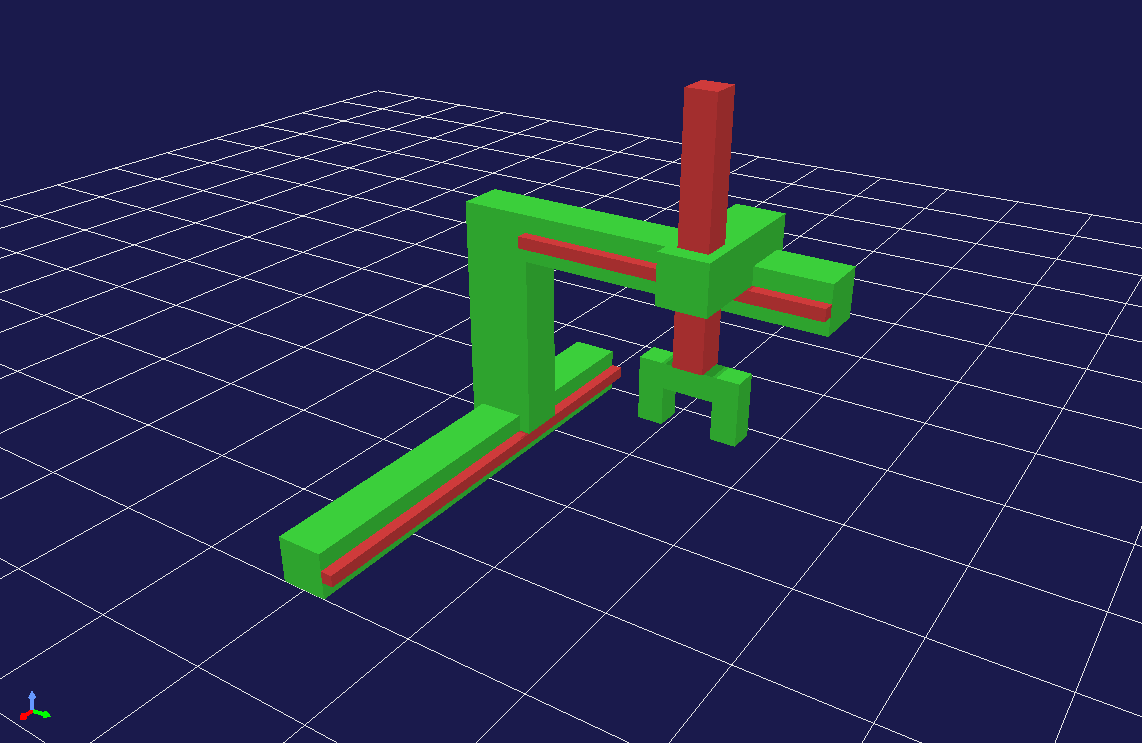

In [140]:
%display

# Use built robot

In [7]:
robot=RobotModel.loadModelItem("builder_cartesian_robot.body")

In [22]:
robot.registerEndEffector('arm', ## end-effector
                          'LINK2', ## tip-link
                          tip_link_to_eef=coordinates(fv(0, 0.3, 0), fv(0.707107, 0, 0, 0.707107)),
                          joint_list = robot.jointNames
                          )

In [37]:
robot.arm.inverseKinematics(coordinates(fv(0.6, 0.9, 0.6)), constraints='xyz')

(True, 4)